# Understanding ROC-AUC curves!

We know from last time tha evaluating classification models is a bit hard, we might want to start looking back at formalizing some of the things that we did last class. Let's first start by thinking that we only think of classification as trying to classify for one of the possible classes. Then we say that all observations that belong to that class are "positives" and that all of those that do not are "negatives". Then when we add the idea of prediction and our results we have 4 possible type of results:


* True positives (TP): The observations that have been predicted to be positive and are actually positive

* True negatives (TN): The observations that have been predicted to be negative and are actually negative

* False positives (FP): The observations that have been predicted to be positive, but are actually negative

* False negatives (FP): The observations that have been predicted to be negative, but are actually positive


These names come from medical analysis. The chart below is how they are usually thought of:


![CMat](https://acutecaretesting.org/-/media/acutecaretesting/articles/table-i-comparing-a-method-with-the-clinical-truth.gif?w=300&h=193&as=1)

If you recall our last class where we had classes 0 and 1, we had a confusion matrix that looked like:

In [1]:
import pandas as pd

confdf=pd.DataFrame({"pred:0":[3757, 529], "pred:1":[381,697]},
                    index=['true:0', 'true:1'] )

confdf

,pred:0,pred:1
true:0,3757,381
true:1,529,697


If 0  were to be our reference label, our confusion matrix sections would be:



In [2]:
confdf2=pd.DataFrame({"pred:0":["TP", "FP"], "pred:1":["FN","TN"]},
                    index=['true:0', 'true:1'] )

confdf2

,pred:0,pred:1
true:0,TP,FN
true:1,FP,TN


We can define a few interesting rates from these numbers:


* True Positive Rate (TPR) or sensitivity

$$TPR=\frac{TP}{TP+FN}$$

(This was our definition of recall!)


* False Positive Rate (FPR)

$$FPR=\frac{FP}{FP+TN}$$

* Specificity

$$Specificity=\frac{TN}{TN+FP}$$


Note that:

$$ FPR= 1 - Specificity$$



## ROC Curve

A ROC curve is a curve that has the True Positive rate in the y axis, and the false positive rate in the x axis. The points plotted are the coordinates of true positve rate and false positive rate that occur as the threshold of probability for assigning a label change, from needing 1 to assign the label to zero.


We will use the iris dataset to do our analysis. The iris dataset is included within sklearn

In [3]:
import matplotlib.pyplot as plt

import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import RocCurveDisplay
from plotnine import *
from sklearn.ensemble import RandomForestClassifier 
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier
from sklearn.metrics import roc_curve, auc
from sklearn import datasets
from sklearn.metrics import roc_auc_score
%matplotlib inline

In [4]:
iris = datasets.load_iris()
X = iris.data
y = iris.target

In [5]:
X

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

In [6]:
#These are types of flowers

list(iris.target_names)

['setosa', 'versicolor', 'virginica']

In [7]:
#What are our features

list(iris.feature_names)

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [8]:
# Add noisy features to make the problem harder
random_state = np.random.RandomState(0)
n_samples, n_features = X.shape
X = np.c_[X, random_state.randn(n_samples, 200 * n_features)]

In [9]:
#Let's binarize

# Binarize the output
y = label_binarize(y, classes=[0, 1, 2])

In [10]:
y

array([[1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0,

In [11]:
# shuffle and split training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2,
                                                    random_state=0)

In [12]:
# Let's build a 1 vs all classifier:


#clf=rf_clf()

classifier = OneVsRestClassifier(RandomForestClassifier(n_estimators=25))


y_score = classifier.fit(X_train, y_train).predict_proba(X_test)


In [13]:
y_score

array([[0.16, 0.36, 0.6 ],
       [0.28, 0.36, 0.44],
       [0.44, 0.16, 0.4 ],
       [0.16, 0.32, 0.6 ],
       [0.44, 0.24, 0.36],
       [0.24, 0.24, 0.48],
       [0.72, 0.2 , 0.2 ],
       [0.24, 0.48, 0.24],
       [0.4 , 0.16, 0.44],
       [0.08, 0.4 , 0.36],
       [0.24, 0.4 , 0.44],
       [0.36, 0.48, 0.24],
       [0.24, 0.28, 0.12],
       [0.2 , 0.32, 0.24],
       [0.28, 0.44, 0.28],
       [0.56, 0.32, 0.12],
       [0.36, 0.52, 0.28],
       [0.12, 0.4 , 0.28],
       [0.52, 0.48, 0.36],
       [0.4 , 0.24, 0.16],
       [0.28, 0.24, 0.32],
       [0.16, 0.04, 0.12],
       [0.6 , 0.16, 0.24],
       [0.44, 0.28, 0.16],
       [0.28, 0.4 , 0.52],
       [0.6 , 0.32, 0.32],
       [0.6 , 0.44, 0.2 ],
       [0.24, 0.44, 0.4 ],
       [0.32, 0.28, 0.24],
       [0.36, 0.48, 0.4 ]])

In [14]:
#number of classes

nclass=y.shape[1]

In [15]:
# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(nclass):
    fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

In [16]:
#Let's look at the dictionaries!


fpr

{0: array([0.        , 0.        , 0.        , 0.        , 0.        ,
        0.05263158, 0.15789474, 0.21052632, 0.42105263, 0.68421053,
        0.73684211, 0.89473684, 1.        ]),
 1: array([0.        , 0.        , 0.11764706, 0.17647059, 0.29411765,
        0.35294118, 0.52941176, 0.58823529, 0.82352941, 0.88235294,
        1.        , 1.        ]),
 2: array([0.        , 0.        , 0.        , 0.08333333, 0.33333333,
        0.375     , 0.5       , 0.70833333, 0.875     , 1.        ])}

In [17]:
tpr

{0: array([0.        , 0.09090909, 0.36363636, 0.54545455, 0.81818182,
        0.90909091, 1.        , 1.        , 1.        , 1.        ,
        1.        , 1.        , 1.        ]),
 1: array([0.        , 0.07692308, 0.23076923, 0.38461538, 0.53846154,
        0.61538462, 0.69230769, 0.84615385, 0.84615385, 0.84615385,
        0.92307692, 1.        ]),
 2: array([0.        , 0.33333333, 0.66666667, 0.83333333, 0.83333333,
        1.        , 1.        , 1.        , 1.        , 1.        ])}

In [18]:
roc_auc

{0: 0.9880382775119617, 1: 0.6380090497737556, 2: 0.9340277777777778}

In [19]:
#Let's make a dataframe containing all of these!

rocplotdf0=pd.DataFrame()

rocplotdf0['fpr_0'], rocplotdf0['tpr_0']=fpr[0], tpr[0]

rocplotdf1=pd.DataFrame()

rocplotdf1['fpr_1'], rocplotdf1['tpr_1']=fpr[1], tpr[1]

rocplotdf2=pd.DataFrame()

rocplotdf2['fpr_2'], rocplotdf2['tpr_2']=fpr[2], tpr[2]


In [20]:
rocplotdf0

,fpr_0,tpr_0
0,0.000000,0.000000
1,0.000000,0.090909
2,0.000000,0.363636
3,0.000000,0.545455
4,0.000000,0.818182
5,0.052632,0.909091
6,0.157895,1.000000
7,0.210526,1.000000
8,0.421053,1.000000
9,0.684211,1.000000


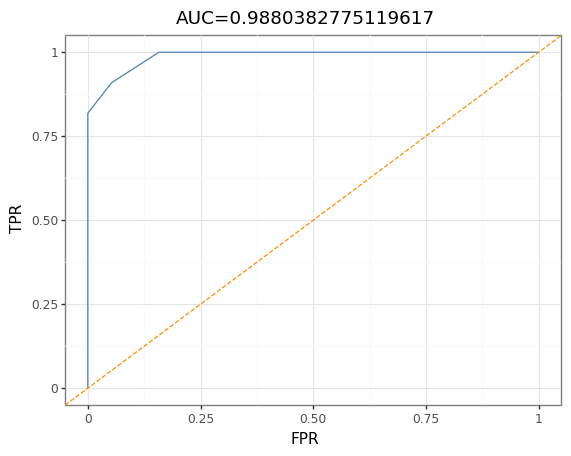

<ggplot: (8767517919485)>

In [21]:
#Plotting!

(ggplot(data=rocplotdf0, mapping=aes(x='fpr_0', y='tpr_0'))+
geom_line(color='steelblue')+
ggtitle(f'AUC={roc_auc[0]}')+
geom_abline(linetype='dashed', color='darkorange')+
 ylab("TPR")+
 xlab("FPR")+
 theme_bw()
)

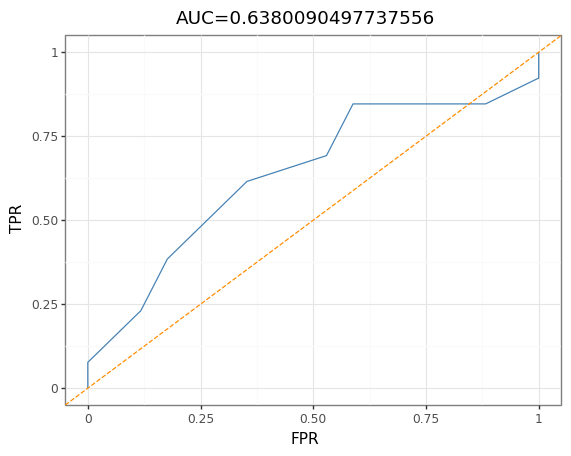

<ggplot: (8767479542887)>

In [22]:
#For the second label

(ggplot(data=rocplotdf1, mapping=aes(x='fpr_1', y='tpr_1'))+
geom_line(color='steelblue')+
ggtitle(f'AUC={roc_auc[1]}')+
geom_abline(linetype='dashed', color='darkorange')+
 ylab("TPR")+
 xlab("FPR")+
 theme_bw()
)

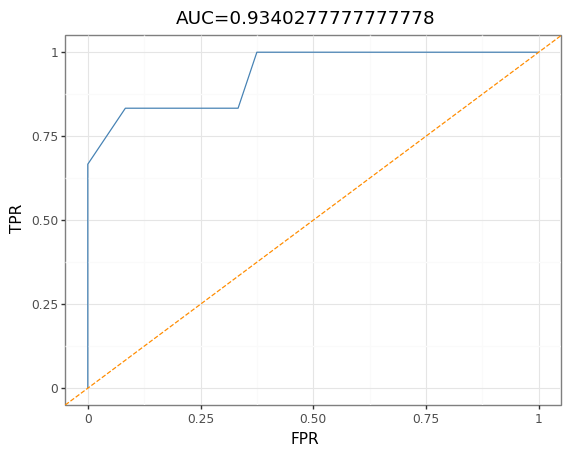

<ggplot: (8767518023497)>

In [23]:
#For the third label


(ggplot(data=rocplotdf2, mapping=aes(x='fpr_2', y='tpr_2'))+
geom_line(color='steelblue')+
ggtitle(f'AUC={roc_auc[2]}')+
geom_abline(linetype='dashed', color='darkorange')+
 ylab("TPR")+
 xlab("FPR")+
 theme_bw()
)

Let's think for a second. If the threshold for being classified as our reference class is probability equal to 1, it's very difficult we would ever classify anything as that reference class, hence the fact that we start at (0,0), if our threshold was zero... well we would classify EVERYTHING as that class, hence we have the curve ends at (1,1). 

The 45 degree line is a hypothetical model where it's just random chance. 

Furthermore, the lower our threshold the higher our recall, but also the higher the number of false positives among all labels that are truly negative.  The curve shows the balance, the closer it gets to a rectangle, the closer we know we have gotten to obtain recall without really increasing much on the false positive rate. Thus we take the area under the curve as one of the best measures we can use. It goes from zero to 1. 






# Precision recall curves

We can also do an evaluation of the model using a precision recall curve.

In [24]:
from sklearn.metrics import precision_recall_curve
#Does not support multilabel

In [25]:
precision0, recall0, _ = precision_recall_curve(y_test[:,0],y_score[:,0])

In [26]:
precision1, recall1, _ = precision_recall_curve(y_test[:,1],y_score[:,1])

In [27]:
precision2, recall2, _ = precision_recall_curve(y_test[:,2],y_score[:,2])

In [28]:
#Let's make a dataframe containing all of these!

prplotdf0=pd.DataFrame()

prplotdf0['pr_0'], prplotdf0['r_0']=precision0, recall0

prplotdf1=pd.DataFrame()

prplotdf1['pr_1'], prplotdf1['r_1']=precision1, recall1

prplotdf2=pd.DataFrame()

prplotdf2['pr_2'], prplotdf2['r_2']=precision2, recall2


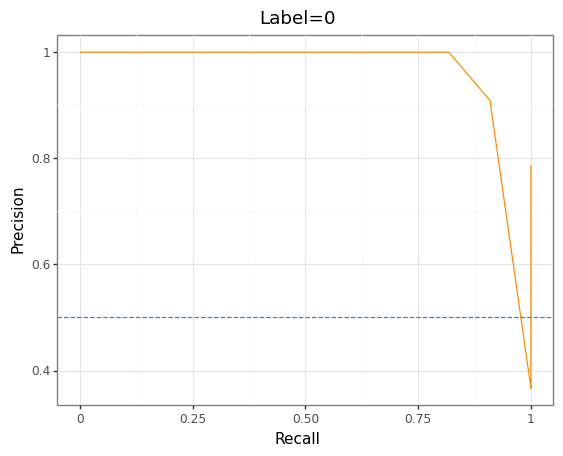

<ggplot: (8767518010474)>

In [29]:
(ggplot(data=prplotdf0, mapping=aes(x='r_0', y='pr_0'))+
geom_line(color='darkorange')+
 geom_hline(yintercept=0.5, linetype='dashed', color='steelblue')+
 xlab('Recall')+
 ylab("Precision")+
 ggtitle("Label=0")+
 theme_bw()
)

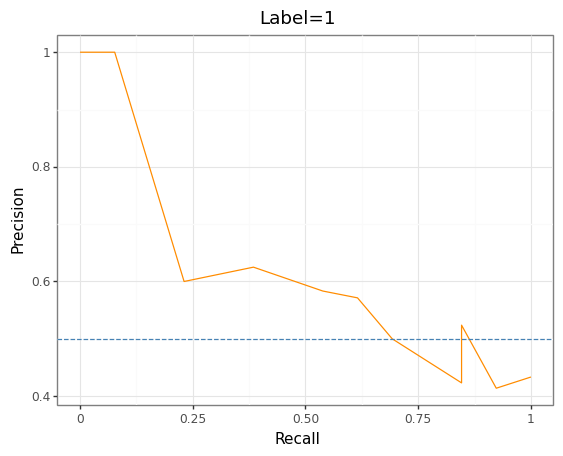

<ggplot: (8767479536806)>

In [30]:
(ggplot(data=prplotdf1, mapping=aes(x='r_1', y='pr_1'))+
geom_line(color='darkorange')+
 geom_hline(yintercept=0.5, linetype='dashed', color='steelblue')+
 xlab('Recall')+
 ylab("Precision")+
 ggtitle("Label=1")+
 theme_bw()
)

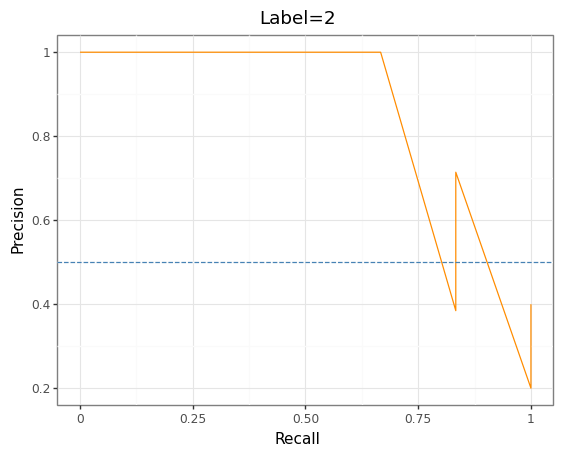

<ggplot: (8767518055343)>

In [31]:
(ggplot(data=prplotdf2, mapping=aes(x='r_2', y='pr_2'))+
geom_line(color='darkorange')+
 geom_hline(yintercept=0.5, linetype='dashed', color='steelblue')+
 xlab('Recall')+
 ylab("Precision")+
 ggtitle("Label=2")+
 theme_bw()
)

The idea is similar, if we have a threshold probabiltty as 1, we have that precision is very high (no true positives or negatives or few true positives) and that it starts climbing down as the threshold probability diminishes. At threshold 0, we have perfect recall because we say everything is a positive label. 

We don't really compute an AUC metric, but we could.